In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('LCK_summer_2024.csv')
df

,GameID,Team,Side,Result,Player,Champion,Role,Level,Kills,Deaths,...,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,58327,DK,Blue,Win,kingen,Skarner,TOP,15,3,0,...,20005,0,39,536,11355,0,7,24,0,0
1,58327,DK,Blue,Win,Lucid,Vi,JUNGLE,14,1,0,...,25693,0,16,210,21916,0,11,28,0,0
2,58327,DK,Blue,Win,ShowMaker,Taliyah,MID,16,11,0,...,3816,0,27,343,7742,0,13,31,0,0
3,58327,DK,Blue,Win,Aiming,Xayah,ADC,15,7,0,...,4936,0,11,68,9710,0,4,22,0,0
4,58327,DK,Blue,Win,Kellin,Rakan,SUPPORT,11,0,1,...,11300,1875,21,63,11941,0,16,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,62087,GEN,Red,Win,Kiin,Renekton,TOP,18,1,1,...,50373,0,22,255,44420,46,13,37,0,0
2086,62087,GEN,Red,Win,Canyon,Lillia,JUNGLE,17,2,1,...,30493,0,20,692,41566,58,12,30,150,0
2087,62087,GEN,Red,Win,Chovy,Tristana,MID,18,9,3,...,19531,0,9,214,27431,101,9,32,150,700
2088,62087,GEN,Red,Win,Peyz,Ziggs,ADC,18,6,3,...,5554,0,27,463,11932,95,10,25,300,300


In [3]:
print(df['KDA'].dtype)

object


In [4]:
kda_col = None
for col in df.columns:
    if "KDA" in col:
        kda_col = col
        break

mask = df[kda_col] == "Perfect KDA"
df.loc[mask, kda_col] = df.loc[mask].apply(
    lambda row: int(row['Kills']) + int(row['Assists']), axis=1
)

df

,GameID,Team,Side,Result,Player,Champion,Role,Level,Kills,Deaths,...,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,58327,DK,Blue,Win,kingen,Skarner,TOP,15,3,0,...,20005,0,39,536,11355,0,7,24,0,0
1,58327,DK,Blue,Win,Lucid,Vi,JUNGLE,14,1,0,...,25693,0,16,210,21916,0,11,28,0,0
2,58327,DK,Blue,Win,ShowMaker,Taliyah,MID,16,11,0,...,3816,0,27,343,7742,0,13,31,0,0
3,58327,DK,Blue,Win,Aiming,Xayah,ADC,15,7,0,...,4936,0,11,68,9710,0,4,22,0,0
4,58327,DK,Blue,Win,Kellin,Rakan,SUPPORT,11,0,1,...,11300,1875,21,63,11941,0,16,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,62087,GEN,Red,Win,Kiin,Renekton,TOP,18,1,1,...,50373,0,22,255,44420,46,13,37,0,0
2086,62087,GEN,Red,Win,Canyon,Lillia,JUNGLE,17,2,1,...,30493,0,20,692,41566,58,12,30,150,0
2087,62087,GEN,Red,Win,Chovy,Tristana,MID,18,9,3,...,19531,0,9,214,27431,101,9,32,150,700
2088,62087,GEN,Red,Win,Peyz,Ziggs,ADC,18,6,3,...,5554,0,27,463,11932,95,10,25,300,300


In [5]:
print(df['KDA'].dtype)

object


In [6]:
df['KDA'] = df['KDA'].astype(float)
df['KDA'].dtype

dtype('float64')

In [7]:
df['KDA'].mean()

np.float64(5.1640191387559815)

In [8]:
df["Champion"] = df["Champion"].replace("K", "K'Sante")
df

,GameID,Team,Side,Result,Player,Champion,Role,Level,Kills,Deaths,...,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,58327,DK,Blue,Win,kingen,Skarner,TOP,15,3,0,...,20005,0,39,536,11355,0,7,24,0,0
1,58327,DK,Blue,Win,Lucid,Vi,JUNGLE,14,1,0,...,25693,0,16,210,21916,0,11,28,0,0
2,58327,DK,Blue,Win,ShowMaker,Taliyah,MID,16,11,0,...,3816,0,27,343,7742,0,13,31,0,0
3,58327,DK,Blue,Win,Aiming,Xayah,ADC,15,7,0,...,4936,0,11,68,9710,0,4,22,0,0
4,58327,DK,Blue,Win,Kellin,Rakan,SUPPORT,11,0,1,...,11300,1875,21,63,11941,0,16,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,62087,GEN,Red,Win,Kiin,Renekton,TOP,18,1,1,...,50373,0,22,255,44420,46,13,37,0,0
2086,62087,GEN,Red,Win,Canyon,Lillia,JUNGLE,17,2,1,...,30493,0,20,692,41566,58,12,30,150,0
2087,62087,GEN,Red,Win,Chovy,Tristana,MID,18,9,3,...,19531,0,9,214,27431,101,9,32,150,700
2088,62087,GEN,Red,Win,Peyz,Ziggs,ADC,18,6,3,...,5554,0,27,463,11932,95,10,25,300,300


In [9]:
df = df.apply(lambda col: col.str.replace('%', '', regex=False) if col.dtype == "object" and col.str.contains('%').any() else col)
df

,GameID,Team,Side,Result,Player,Champion,Role,Level,Kills,Deaths,...,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,58327,DK,Blue,Win,kingen,Skarner,TOP,15,3,0,...,20005,0,39,536,11355,0,7,24,0,0
1,58327,DK,Blue,Win,Lucid,Vi,JUNGLE,14,1,0,...,25693,0,16,210,21916,0,11,28,0,0
2,58327,DK,Blue,Win,ShowMaker,Taliyah,MID,16,11,0,...,3816,0,27,343,7742,0,13,31,0,0
3,58327,DK,Blue,Win,Aiming,Xayah,ADC,15,7,0,...,4936,0,11,68,9710,0,4,22,0,0
4,58327,DK,Blue,Win,Kellin,Rakan,SUPPORT,11,0,1,...,11300,1875,21,63,11941,0,16,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,62087,GEN,Red,Win,Kiin,Renekton,TOP,18,1,1,...,50373,0,22,255,44420,46,13,37,0,0
2086,62087,GEN,Red,Win,Canyon,Lillia,JUNGLE,17,2,1,...,30493,0,20,692,41566,58,12,30,150,0
2087,62087,GEN,Red,Win,Chovy,Tristana,MID,18,9,3,...,19531,0,9,214,27431,101,9,32,150,700
2088,62087,GEN,Red,Win,Peyz,Ziggs,ADC,18,6,3,...,5554,0,27,463,11932,95,10,25,300,300


In [9]:
game_ids = sorted(df["GameID"].unique())

match_ids = []
i = 0
while i < len(game_ids) - 1:
    g1 = game_ids[i]
    g2 = game_ids[i+1]

    if i + 2 < len(game_ids):
        g3 = game_ids[i + 2]
        if g2 == g1 + 1 and g3 == g1 + 2:
            match_ids.append(g1)
            i += 3
        else:
            match_ids.append(g1)
            i += 2
    else:
        match_ids.append(g1)
        i += 2

print("Detected MatchIDs:")
print(match_ids)
print(f"Total matches detected: {len(match_ids)}")

Detected MatchIDs:
[np.int64(58327), np.int64(58330), np.int64(59030), np.int64(59033), np.int64(59036), np.int64(59039), np.int64(59042), np.int64(59045), np.int64(59048), np.int64(59051), np.int64(59273), np.int64(59276), np.int64(59279), np.int64(59282), np.int64(59285), np.int64(59288), np.int64(59291), np.int64(59294), np.int64(59297), np.int64(59300), np.int64(59567), np.int64(59570), np.int64(59573), np.int64(59576), np.int64(59579), np.int64(59582), np.int64(59585), np.int64(59588), np.int64(59591), np.int64(59594), np.int64(60034), np.int64(60037), np.int64(60040), np.int64(60043), np.int64(60046), np.int64(60049), np.int64(60052), np.int64(60055), np.int64(60058), np.int64(60061), np.int64(60683), np.int64(60686), np.int64(60689), np.int64(60692), np.int64(60695), np.int64(60698), np.int64(60701), np.int64(60704), np.int64(60707), np.int64(60710), np.int64(61072), np.int64(61075), np.int64(61078), np.int64(61081), np.int64(61084), np.int64(61087), np.int64(61090), np.int64(61

In [10]:
game_to_match = {}
for match_id in match_ids:
    for i in range(3):
        game_to_match[match_id + i] = match_id

df["MatchID"] = df["GameID"].map(game_to_match)

In [11]:
game_results = df.groupby(["GameID", "Team"]).first().reset_index()
game_win_counts = game_results.groupby("Team")["Result"].value_counts().unstack(fill_value=0)
game_wins = game_win_counts.get("Win", 0)
game_losses = game_win_counts.get("Loss", 0)

# Tính kết quả từng trận (MatchID)
match_results = game_results.groupby(["MatchID", "Team"])["Result"].agg(lambda x: (x == "Win").sum()).reset_index()
match_scores = match_results.pivot(index="MatchID", columns="Team", values="Result").dropna(axis=0, thresh=2)

match_win_counts = {}
match_loss_counts = {}

for match_id, row in match_scores.iterrows():
    teams = row.dropna()
    if len(teams) != 2:
        continue  # Bỏ qua nếu trận không đủ 2 đội
    team1, team2 = teams.index
    score1, score2 = teams.values
    if score1 > score2:
        match_win_counts[team1] = match_win_counts.get(team1, 0) + 1
        match_loss_counts[team2] = match_loss_counts.get(team2, 0) + 1
    else:
        match_win_counts[team2] = match_win_counts.get(team2, 0) + 1
        match_loss_counts[team1] = match_loss_counts.get(team1, 0) + 1

# Tạo bảng xếp hạng
teams = sorted(set(df["Team"]))
table = []

for team in teams:
    mw = match_win_counts.get(team, 0)
    ml = match_loss_counts.get(team, 0)
    gw = game_wins.get(team, 0)
    gl = game_losses.get(team, 0)
    diff = gw - gl
    table.append({
        "Team": team,
        "Match": f"{mw}–{ml}",
        "Game": f"{gw}–{gl}",
        "Diff": f"{'+' if diff >= 0 else ''}{diff}",
        "Match Wins": mw,
        "Diff Num": diff
    })

# Sắp xếp & in bảng kết quả
table_df = pd.DataFrame(table)
table_df = table_df.sort_values(by=["Match Wins", "Diff Num"], ascending=False).reset_index(drop=True)
table_df.index += 1
table_df.insert(0, "Rank", table_df.index)

final_df = table_df[["Rank","Team", "Match", "Game", "Diff"]]

def highlight_rows_by_rank(row):
    rank = row["Rank"]
    if rank <= 2:
        return ['background-color: lightgreen; color: black'] * len(row)
    elif rank <= 6:
        return ['background-color: khaki; color: black'] * len(row)
    else:
        return ['background-color: salmon; color: black'] * len(row)
    
print("\n📊 Group Stage Final Standings:")
final_df.style.apply(highlight_rows_by_rank, axis=1).hide(axis="index").set_properties(**{'text-align': 'center'})


📊 Group Stage Final Standings:


Rank,Team,Match,Game,Diff
1,GEN,17–1,35–3,+32
2,HLE,14–4,30–11,+19
3,DK,13–5,29–16,+13
4,T1,11–7,25–19,+6
5,KT,9–9,21–23,-2
6,FOX,8–10,17–24,-7
7,KDF,7–11,21–23,-2
8,NS,5–13,13–27,-14
9,DRX,4–14,10–30,-20
10,BRO,2–16,8–33,-25


In [12]:
team_results = df.groupby(["GameID", "Team"]).first().reset_index()
team_results


,GameID,Team,Side,Result,Player,Champion,Role,Level,Kills,Deaths,...,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost,MatchID
0,58327,DK,Blue,Win,kingen,Skarner,TOP,15,3,0,...,0,39,536,11355,0,7,24,0,0,58327
1,58327,HLE,Red,Loss,Doran,Zac,TOP,14,0,4,...,0,18,292,26485,83,4,22,0,0,58327
2,58328,DK,Red,Loss,kingen,Twisted Fate,TOP,16,2,3,...,0,34,277,16233,112,8,25,150,0,58327
3,58328,HLE,Blue,Win,Doran,Skarner,TOP,18,4,1,...,0,44,1308,20130,21,11,28,0,100,58327
4,58329,DK,Blue,Win,kingen,K'Sante,TOP,18,0,3,...,2059,39,1647,49992,138,16,40,0,0,58327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,62084,NS,Red,Win,Mihile,Gnar,TOP,18,3,2,...,0,24,615,23606,74,8,25,0,100,62083
414,62086,GEN,Red,Win,Kiin,Nasus,TOP,15,1,1,...,0,12,332,25644,8,8,28,0,0,62086
415,62086,HLE,Blue,Loss,Doran,Gnar,TOP,14,0,5,...,0,19,366,22189,149,8,24,0,0,62086
416,62087,GEN,Red,Win,Kiin,Renekton,TOP,18,1,1,...,0,22,255,44420,46,13,37,0,0,62086


In [13]:
games_played = team_results["Team"].value_counts()
games_played

Team
DK     45
KT     44
T1     44
KDF    44
HLE    41
FOX    41
BRO    41
NS     40
DRX    40
GEN    38
Name: count, dtype: int64

In [14]:
wins = team_results[team_results["Result"] == "Win"]["Team"].value_counts()
wins

Team
GEN    35
HLE    30
DK     29
T1     25
KDF    21
KT     21
FOX    17
NS     13
DRX    10
BRO     8
Name: count, dtype: int64

In [15]:
win_rate = (wins / games_played).fillna(0) * 100

win_rate_df = pd.DataFrame({
    "Team": win_rate.index,
    "Win Rate (%)": win_rate.values.round(2)
}).sort_values(by="Win Rate (%)", ascending=False).reset_index(drop=True)

win_rate_df.index += 1
win_rate_df.style.format({"Win Rate (%)": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Team,Win Rate (%)
1,GEN,92.11
2,HLE,73.17
3,DK,64.44
4,T1,56.82
5,KT,47.73
6,KDF,47.73
7,FOX,41.46
8,NS,32.50
9,DRX,25.00
10,BRO,19.51


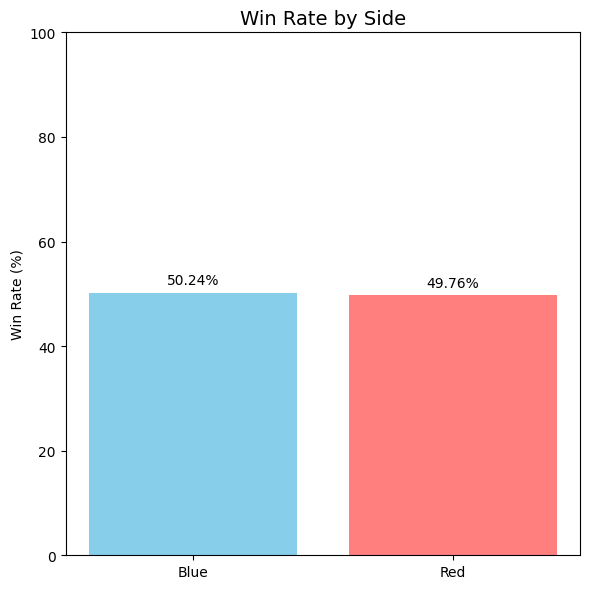

In [ ]:
team_results = df.groupby(["GameID", "Team", "Side"]).first().reset_index()

side_counts = team_results["Side"].value_counts()
side_wins = team_results[team_results["Result"] == "Win"]["Side"].value_counts()
side_win_rate = (side_wins / side_counts * 100).round(2)

side_win_df = pd.DataFrame({
    "Side": side_win_rate.index,
    "Win Rate (%)": side_win_rate.values
})
    
plt.figure(figsize=(6, 6))
bars = plt.bar(side_win_df["Side"], side_win_df["Win Rate (%)"], color=["#87CEEB", "#FF7F7F"])
plt.title("Win Rate by Side", fontsize=14)
plt.ylabel("Win Rate (%)")
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [17]:
champion_stats = df.groupby(["Champion", "GameID"]).first().reset_index()

champion_counts = champion_stats["Champion"].value_counts()
champion_wins = champion_stats[champion_stats["Result"] == "Win"]["Champion"].value_counts()
champion_win_rate = (champion_wins / champion_counts * 100).round(2)

champion_df = pd.DataFrame({
    "Champion": champion_win_rate.index,
    "Win Rate (%)": champion_win_rate.values,
    "Games Played": champion_counts[champion_win_rate.index].values
})

champion_df = champion_df[champion_df["Games Played"] >= 50]

champion_df = champion_df.sort_values(by="Win Rate (%)", ascending=False).head(10).reset_index(drop=True)

champion_df.style.format({"Win Rate (%)": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Champion,Win Rate (%),Games Played
0,Maokai,65.38,52
1,Alistar,60.00,60
2,Zeri,53.93,89
3,Ezreal,53.09,81
4,Azir,52.94,51
5,Rakan,50.98,51
6,Tristana,50.00,70
7,K'Sante,47.50,80
8,Corki,46.28,121
9,Rell,46.27,67


In [10]:
metrics = ["KDA", "KP%", "CSM", "GPM", "DPM", "VSPM", "DMG%", "GD@15", "CSD@15", "XPD@15"]
print(df[metrics].dtypes)

KDA       float64
KP%        object
CSM       float64
GPM         int64
DPM         int64
VSPM      float64
DMG%       object
GD@15       int64
CSD@15      int64
XPD@15      int64
dtype: object


In [11]:
for col in metrics:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df[metrics].dtypes)

KDA       float64
KP%       float64
CSM       float64
GPM         int64
DPM         int64
VSPM      float64
DMG%      float64
GD@15       int64
CSD@15      int64
XPD@15      int64
dtype: object


In [18]:
top_kda = df.groupby("Player")["KDA"].mean().round(2).sort_values(ascending=False).head(10).reset_index()
top_kda.columns = ["Player", "KDA"]

top_kda.style.format({"KDA": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,KDA
0,Peyz,9.76
1,Aiming,9.15
2,Canyon,8.24
3,Peanut,7.54
4,Lucid,7.48
5,Viper,7.36
6,Chovy,7.29
7,Pyosik,7.03
8,Deft,6.98
9,Zeka,6.78


In [19]:
df["KP%"] = df["KP%"].astype(str).str.replace('%', '', regex=False).astype(float)

top_kp = df.groupby("Player")["KP%"].mean().round(2).sort_values(ascending=False).head(10).reset_index()
top_kp.columns = ["Player", "Avg KP (%)"]

top_kp.style.format({"Avg KP (%)": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,Avg KP (%)
0,Pyosik,78.26
1,Aiming,75.28
2,Vital,75.16
3,YoungJae,75.05
4,BeryL,75.01
5,Sponge,74.59
6,Peanut,74.52
7,Raptor,74.45
8,Cuzz,73.97
9,Andil,73.64


In [10]:
df["CSM"] = pd.to_numeric(df["CSM"], errors="coerce")
top_csm = df.groupby("Player")["CSM"].mean().round(2).sort_values(ascending=False).head(10).reset_index()
top_csm.columns = ["Player", "Avg CSM"]
top_csm.style.format({"Avg CSM": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,Avg CSM
0,Chovy,10.48
1,Aiming,10.26
2,Viper,10.16
3,Clozer,10.10
4,Zeka,9.82
5,Bulldog,9.69
6,Leaper,9.63
7,Teddy,9.62
8,Callme,9.60
9,Faker,9.47


In [11]:
df["GPM"] = pd.to_numeric(df["GPM"], errors="coerce")
top_gpm = df.groupby("Player")["GPM"].mean().round(2).sort_values(ascending=False).head(10).reset_index()
top_gpm.columns = ["Player", "Avg GPM"]
top_gpm.style.format({"Avg GPM": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,Avg GPM
0,Chovy,498.00
1,Aiming,493.69
2,Peyz,462.53
3,Viper,462.44
4,Callme,457.00
5,Zeka,455.59
6,Gumayusi,441.02
7,Clozer,439.71
8,Faker,432.61
9,Bdd,431.02


In [12]:
df["DPM"] = pd.to_numeric(df["DPM"], errors="coerce")
top_dpm = df.groupby("Player")["DPM"].mean().round(2).sort_values(ascending=False).head(10).reset_index()
top_dpm.columns = ["Player", "Avg DPM"]
top_dpm.style.format({"Avg DPM": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,Avg DPM
0,Chovy,841.63
1,Aiming,817.09
2,Peyz,788.58
3,Viper,778.71
4,Bdd,732.05
5,SeTab,728.56
6,Deft,711.55
7,Pullbae,695.00
8,Fisher,689.64
9,ShowMaker,682.98


In [13]:
df["DMG%"] = df["DMG%"].astype(str).str.replace('%', '', regex=False).astype(float)
top_dmg_pct = df.groupby("Player")["DMG%"].mean().round(2).sort_values(ascending=False).head(10).reset_index()
top_dmg_pct.columns = ["Player", "Avg DMG (%)"]
top_dmg_pct.style.format({"Avg DMG (%)": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,Avg DMG (%)
0,Aiming,31.02
1,SeTab,31.00
2,Viper,29.78
3,Fisher,29.60
4,Kyeahoo,29.53
5,Bdd,29.50
6,Teddy,28.81
7,Deft,28.49
8,Chovy,28.39
9,FATE,28.35


In [14]:
df["GD@15"] = pd.to_numeric(df["GD@15"], errors="coerce")
top_gd15 = df.groupby("Player")["GD@15"].mean().round(1).sort_values(ascending=False).head(10).reset_index()
top_gd15.columns = ["Player", "Avg GD@15"]
top_gd15.style.format({"Avg GD@15": "{:.1f}"}).set_properties(**{'text-align': 'center'})

,Player,Avg GD@15
0,Casting,964.3
1,Aiming,628.0
2,Kiin,606.4
3,Chovy,532.0
4,Keria,418.2
5,Canyon,381.3
6,Viper,379.1
7,Doran,358.9
8,BeryL,324.7
9,Zeka,311.9


In [15]:
df["CSD@15"] = pd.to_numeric(df["CSD@15"], errors="coerce")
top_csd15 = df.groupby("Player")["CSD@15"].mean().round(1).sort_values(ascending=False).head(10).reset_index()
top_csd15.columns = ["Player", "Avg CSD@15"]
top_csd15.style.format({"Avg CSD@15": "{:.1f}"}).set_properties(**{'text-align': 'center'})

,Player,Avg CSD@15
0,Aiming,15.2
1,Lehends,13.1
2,Teddy,11.7
3,Chovy,11.6
4,Viper,11.5
5,Kiin,10.9
6,Canyon,9.1
7,Keria,8.0
8,Envyy,7.0
9,Doran,5.3


In [16]:
df["XPD@15"] = pd.to_numeric(df["XPD@15"], errors="coerce")
top_xpd15 = df.groupby("Player")["XPD@15"].mean().round(1).sort_values(ascending=False).head(10).reset_index()
top_xpd15.columns = ["Player", "Avg XPD@15"]
top_xpd15.style.format({"Avg XPD@15": "{:.1f}"}).set_properties(**{'text-align': 'center'})

,Player,Avg XPD@15
0,Kiin,567.2
1,Aiming,539.3
2,Vital,484.7
3,Canyon,468.0
4,Keria,424.0
5,Chovy,335.5
6,Delight,287.8
7,Lehends,267.9
8,BeryL,256.3
9,Peanut,223.0


In [22]:
stats = ["KDA", "KP%", "CSM", "GPM", "DPM", "VSPM", "DMG%", "GD@15", "CSD@15", "XPD@15"]

df_mid = df[df["Role"] == "MID"]
player_avg = df_mid.groupby("Player")[stats].mean()

rank_df = player_avg.rank(ascending=False, method='min').astype(int)
rank_df["Avg Rank"] = rank_df.mean(axis=1).round(2)
rank_df = rank_df.sort_values("Avg Rank")

rank_df.reset_index(inplace=True)
rank_df.index += 1
rank_df.style.format({"Avg Rank": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,KDA,KP%,CSM,GPM,DPM,VSPM,DMG%,GD@15,CSD@15,XPD@15,Avg Rank
1,Chovy,1,14,1,1,1,1,5,1,1,1,2.70
2,Bdd,4,5,7,6,2,5,4,3,4,4,4.40
3,Zeka,2,12,3,3,8,3,10,2,2,2,4.70
4,Clozer,5,6,2,4,7,8,7,9,3,3,5.40
5,ShowMaker,3,8,14,9,6,2,12,4,7,5,7.00
6,Fisher,9,7,9,8,5,13,2,6,6,9,7.40
7,Bulldog,8,9,4,7,10,4,9,8,8,8,7.50
8,Faker,6,15,6,5,9,11,11,5,5,6,7.90
9,SeTab,12,3,11,11,3,6,1,13,11,11,8.20
10,Kyeahoo,7,4,12,12,11,10,3,10,12,12,9.30


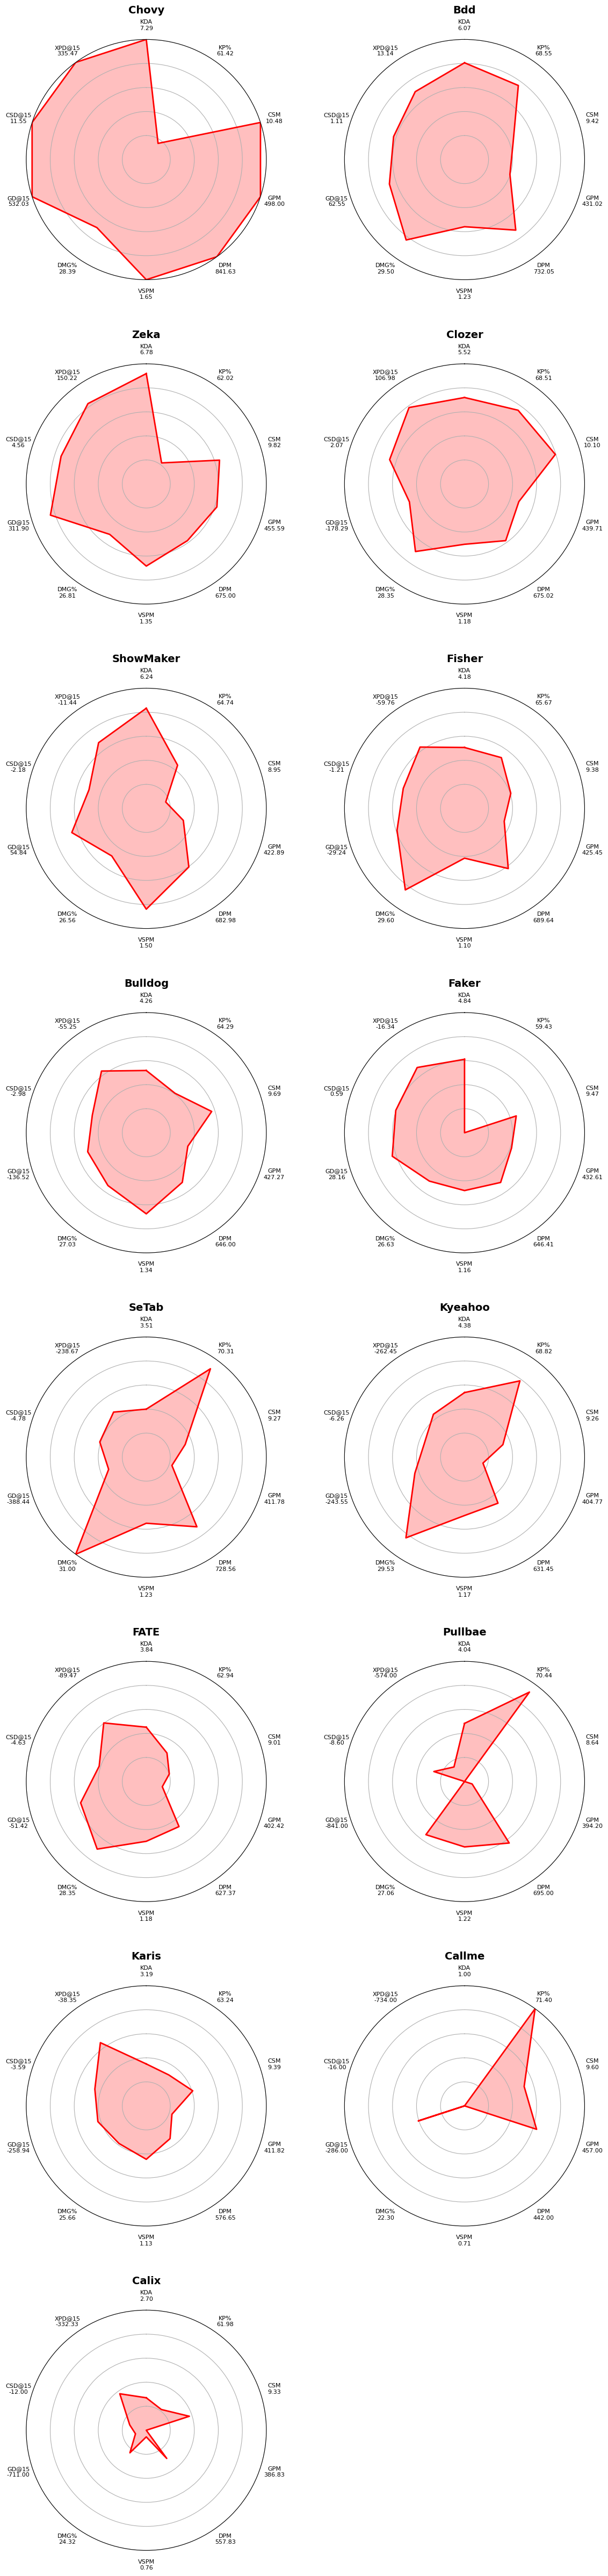

In [35]:
min_vals = player_avg.min()
max_vals = player_avg.max()

# Góc radar
num_vars = len(stats)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# === VẼ NHIỀU RADAR CHART ===
players = rank_df["Player"].tolist()
num_players = len(players)

cols = 2
rows = math.ceil(num_players / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6), subplot_kw=dict(polar=True))
axes = axes.flatten()  # Chuyển thành 1 chiều để dễ xử lý

for idx, player in enumerate(players):
    ax = axes[idx]
    
    player_mean = player_avg.loc[player]
    normalized = (player_mean - min_vals) / (max_vals - min_vals)
    values = normalized.tolist()
    values += values[:1]

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_ylim(0, 1)
    ax.xaxis.grid(False)
    ax.set_xticks([])

    # Vẽ radar
    ax.plot(angles, values, color='red', linewidth=2)
    ax.fill(angles, values, color='red', alpha=0.25)

    # Vẽ nhãn trục
    new_labels = [f"{stat}\n{player_mean[stat]:.2f}" for stat in stats]
    for angle, label in zip(angles[:-1], new_labels):
        ax.text(angle, 1.12, label, ha='center', va='center', fontsize=8)

    ax.set_yticklabels([])
    ax.set_title(f"{player}", size=14, pad=35, weight='bold')

# Tắt các ô thừa nếu có
for i in range(len(players), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(hspace=0.35)
plt.show()

In [11]:
metrics = ["KDA", "KP%", "CSM", "GPM", "DPM", "VSPM", "DMG%", "GD@15", "CSD@15", "XPD@15"]

for col in metrics:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df_mid = df[df["Role"] == "ADC"]
player_avg = df_mid.groupby("Player")[metrics].mean()

rank_df = player_avg.rank(ascending=False, method='min').astype(int)
rank_df["Avg Rank"] = rank_df.mean(axis=1).round(2)
rank_df = rank_df.sort_values("Avg Rank")

rank_df.reset_index(inplace=True)
rank_df.index += 1
rank_df.style.format({"Avg Rank": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,KDA,KP%,CSM,GPM,DPM,VSPM,DMG%,GD@15,CSD@15,XPD@15,Avg Rank
1,Aiming,2,1,1,1,1,7,1,1,1,1,1.70
2,Viper,3,7,2,3,3,6,2,2,3,2,3.30
3,Teddy,7,3,4,8,7,5,3,6,2,3,4.80
4,Deft,4,4,8,6,4,4,4,5,5,5,4.90
5,Peyz,1,5,12,2,2,1,8,3,10,6,5.00
6,Gumayusi,6,9,5,4,8,3,9,4,6,8,6.20
7,Leaper,8,8,3,5,6,11,7,11,8,10,7.70
8,Hena,5,2,9,7,10,2,10,12,12,12,8.10
9,Envyy,11,10,7,11,9,12,6,9,4,4,8.30
10,Jiwoo,10,6,11,9,5,9,5,10,9,11,8.50


In [12]:
metrics = ["KDA", "KP%", "CSM", "GPM", "DPM", "VSPM", "DMG%", "GD@15", "CSD@15", "XPD@15"]

for col in metrics:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df_mid = df[df["Role"] == "TOP"]
player_avg = df_mid.groupby("Player")[metrics].mean()

rank_df = player_avg.rank(ascending=False, method='min').astype(int)
rank_df["Avg Rank"] = rank_df.mean(axis=1).round(2)
rank_df = rank_df.sort_values("Avg Rank")

rank_df.reset_index(inplace=True)
rank_df.index += 1
rank_df.style.format({"Avg Rank": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,KDA,KP%,CSM,GPM,DPM,VSPM,DMG%,GD@15,CSD@15,XPD@15,Avg Rank
1,Kiin,1,5,2,1,2,4,7,2,1,1,2.60
2,Casting,13,2,5,2,1,10,1,1,4,4,4.30
3,Doran,3,1,9,4,4,9,6,3,2,2,4.30
4,kingen,2,11,10,6,3,3,3,6,5,3,5.20
5,Zeus,5,6,8,5,6,8,4,4,3,5,5.40
6,Clear,7,3,4,7,5,12,2,5,7,6,5.80
7,DuDu,4,8,1,3,10,13,11,8,6,9,7.30
8,Mihile,9,10,3,8,7,7,8,12,10,8,8.20
9,PerfecT,6,13,12,10,9,1,10,7,8,7,8.30
10,Morgan,11,9,6,9,8,6,5,10,9,12,8.50


In [13]:
metrics = ["KDA", "KP%", "CSM", "GPM", "DPM", "VSPM", "DMG%", "GD@15", "CSD@15", "XPD@15"]

for col in metrics:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df_mid = df[df["Role"] == "JUNGLE"]
player_avg = df_mid.groupby("Player")[metrics].mean()

rank_df = player_avg.rank(ascending=False, method='min').astype(int)
rank_df["Avg Rank"] = rank_df.mean(axis=1).round(2)
rank_df = rank_df.sort_values("Avg Rank")

rank_df.reset_index(inplace=True)
rank_df.index += 1
rank_df.style.format({"Avg Rank": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,KDA,KP%,CSM,GPM,DPM,VSPM,DMG%,GD@15,CSD@15,XPD@15,Avg Rank
1,Canyon,1,7,1,1,1,9,4,1,1,1,2.70
2,Cuzz,8,6,2,4,2,2,1,5,2,3,3.50
3,Peanut,2,4,3,3,7,1,9,2,4,2,3.70
4,Oner,5,9,4,2,5,8,5,3,3,4,4.80
5,Raptor,6,5,6,5,3,7,3,6,5,6,5.20
6,Lucid,3,8,10,6,10,4,10,4,6,5,6.60
7,YoungJae,10,2,5,8,4,3,2,11,11,11,6.70
8,Pyosik,4,1,9,7,11,5,11,8,10,10,7.60
9,Sponge,11,3,7,10,9,11,7,7,7,8,8.00
10,DDoiV,7,11,11,11,6,6,6,9,9,9,8.50


In [16]:
metrics = ["KDA", "KP%", "CSM", "GPM", "DPM", "VSPM", "DMG%", "GD@15", "CSD@15", "XPD@15"]

for col in metrics:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df_mid = df[df["Role"] == "SUPPORT"]
player_avg = df_mid.groupby("Player")[metrics].mean()

rank_df = player_avg.rank(ascending=False, method='min').astype(int)
rank_df["Avg Rank"] = rank_df.mean(axis=1).round(2)
rank_df = rank_df.sort_values("Avg Rank")

rank_df.reset_index(inplace=True)
rank_df.index += 1
rank_df.style.format({"Avg Rank": "{:.2f}"}).set_properties(**{'text-align': 'center'})

,Player,KDA,KP%,CSM,GPM,DPM,VSPM,DMG%,GD@15,CSD@15,XPD@15,Avg Rank
1,Keria,1,10,2,2,2,9,1,1,2,2,3.20
2,Vital,7,1,8,5,3,1,3,4,6,1,3.90
3,BeryL,8,2,4,3,1,10,2,2,3,5,4.00
4,Lehends,4,13,1,1,4,14,11,3,1,4,5.60
5,Delight,2,5,7,4,8,7,10,5,9,3,6.00
6,Duro,6,11,5,6,14,4,13,6,4,6,7.50
7,Kellin,5,7,14,8,5,3,6,7,12,11,7.80
8,Andil,10,3,10,10,7,11,7,8,10,7,8.30
9,Pleata,9,8,6,11,9,6,5,10,11,10,8.50
10,GuGer,12,12,3,9,6,12,4,12,8,9,8.70


In [42]:
chovy_stats = df[df["Player"] == "Faker"]
stats = ["KDA", "KP%", "CSM", "GPM", "DPM", "VSPM", "DMG%", "GD@15", "CSD@15", "XPD@15"]
print(chovy_stats[stats].mean())

KDA         4.843182
KP%        59.427273
CSM         9.472727
GPM       432.613636
DPM       646.409091
VSPM        1.160909
DMG%       26.631818
GD@15      28.159091
CSD@15      0.590909
XPD@15    -16.340909
dtype: float64


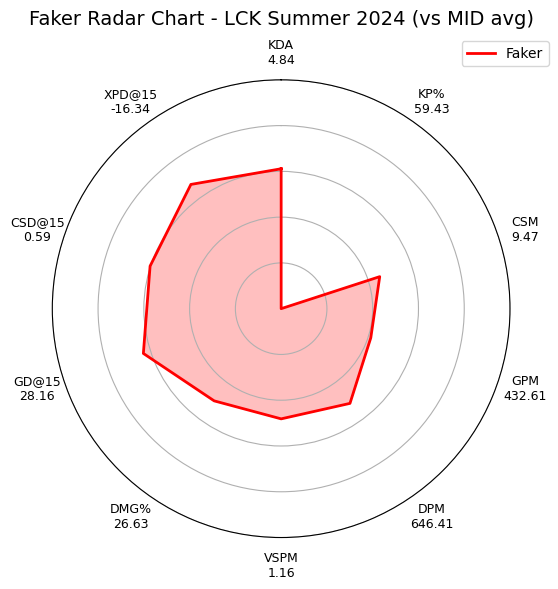

In [20]:
mid_players = df[df["Role"] == "MID"]

stats = ["KDA", "KP%", "CSM", "GPM", "DPM", "VSPM", "DMG%", "GD@15", "CSD@15", "XPD@15"]

player_means = mid_players.groupby("Player")[stats].mean()
min_vals = player_means.min()
max_vals = player_means.max()
mean_vals = player_means.mean()

# Lấy chỉ số
faker_mean = player_means.loc["Faker"]

# Chuẩn hóa chỉ số
faker_normalized = (faker_mean - min_vals) / (max_vals - min_vals)
values = faker_normalized.tolist()
values += values[:1]

# Bắt đầu vẽ biểu đồ radar
labels = stats
num_vars = len(labels)

# Góc xoay của từng trục
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # nối thêm để khép vòng tròn

# Khởi tạo biểu đồ
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_ylim(0, 1)

# Vẽ đường và tô màu
ax.plot(angles, values, color='red', linewidth=2, label="Faker")
ax.fill(angles, values, color='red', alpha=0.25)

# Tùy chỉnh nhãn trục
new_labels = []
for stat in stats:
    label = f"{stat}\n{faker_mean[stat]:.2f}"
    new_labels.append(label)
new_labels += new_labels[:1]

ax.set_xticks([])
for angle, label in zip(angles[:-1], new_labels[:-1]):  # bỏ điểm khép vòng
    ax.text(
        angle,
        1.12,  # >1 để đẩy chữ ra xa vòng
        label,
        ha='center',
        va='center',
        fontsize=9
    )


# Bỏ giá trị y-axis
ax.set_yticklabels([])

ax.set_title("Faker Radar Chart - LCK Summer 2024 (vs MID avg)", size=14, pad=40)

plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()